#### 무게를 찾기 
- 목표 : 농어 (Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐 / 속성 : Length
- 타겟 / 라벨 : Weight

[1] 데이터 준비 및 피쳐 / 타겟 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
DATA_FILE='../data/fish.csv'

In [ ]:
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [ ]:
mask=(fishDF['Species']=='Perch' )
oneDF=fishDF[mask]
oneDF.reset_index(drop=True, inplace=True)
oneDF.index

RangeIndex(start=0, stop=56, step=1)

In [ ]:
#----- 선생님
mask=fishDF.Species.isin(['Perch'])
fishDF=fishDF[mask]
fishDF.head(2)

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7


In [ ]:
oneDF.drop(columns='Species', inplace=True)

[1-1] 피쳐 분석 ==> 상관계수값, 시각화 2가지 모두 고려

In [ ]:
oneDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


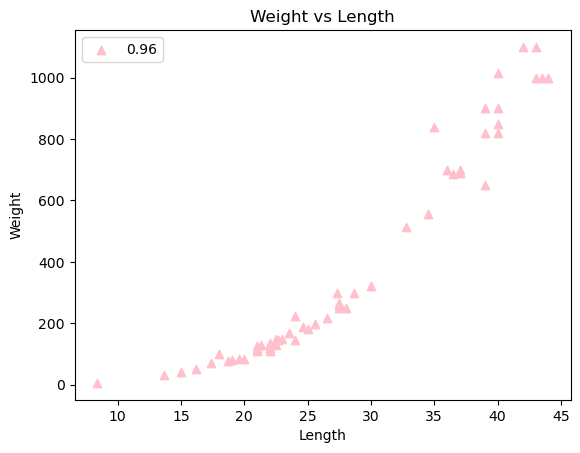

In [ ]:
plt.scatter(oneDF['Length'], oneDF['Weight'], label=round(oneDF.corr()['Weight'][1],2), marker='^', c='pink')
plt.xlabel("Length")
plt.ylabel("Weight")
plt.title('Weight vs Length')
plt.legend()
plt.show()

길이로 무게를 예측하는 회귀 예측을 할 거다

[2] 학습 준비
- 학습 알고리즘 : KNN Regressor 
- 피쳐 스케일링
- 학습용 / 테스트용 데이터셋 분리

- [2-1] 피쳐와 타겟 분리

In [ ]:
features=oneDF[['Length']]
target=oneDF['Weight']

print(f'features => {features.shape}, {features.ndim}D') #2D
print(f'target => {target.shape}, {target.ndim}D') #1D

features => (56, 1), 2D
target => (56,), 1D


- [2-2] 학습용 & 테스트용 데이터셋 분리
* 전체 데이터셋 => 학습용 : 테스트용 = 75:25 , 80:20 , 70:30
* 회귀 데이터셋 이므로 => 데이터 셋 구성 요소에 대한 비율은 고려하지 않아도됨 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    
                                                    random_state=10
                                                    )

# test_size=0.2,

In [ ]:
print( f' X_train : {X_train.shape}, {X_train.ndim}D, y_train : {y_train.shape}, {y_train.ndim}D')
print( f' X_test : {X_test.shape}, {X_test.ndim}D, y_test : {y_test.shape}, {y_test.ndim}D')


 X_train : (42, 1), 2D, y_train : (42,), 1D
 X_test : (14, 1), 2D, y_test : (14,), 1D


In [ ]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

### 정규화 방법 Normalisation
-   방법을 고르려면 각 방법의 특성, 장단점을 고려하여 선택
- 예를 들면 이상치가 많으면 이상치에 민감한 방법 기피 등등
- 이상치를 보려면 boxplot
- 잘 모르겠으면 그냥 다 해서 비교

- [2-3] 피쳐 스케일링

In [ ]:
mmScaler = MinMaxScaler() # minmax라서 mmScaler라고 변수지음 그냥
# 최소값, 최대값, 표준 편차 를 보고 스케일링

In [ ]:
# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [ ]:
mmScaler.min_, mmScaler.data_min_ # 스케일링할때 사용되는 최소값, 원래 데이터에서 최소값

(array([-0.23595506]), array([8.4]))

In [ ]:
mmScaler.scale_,mmScaler.data_max_ # 스케일링할때 사용되는 최대값, 원래 데이터에서 최대값

(array([0.02808989]), array([44.]))

In [ ]:
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((14, 1), 0.18539325842696627, 0.8595505617977527)

In [ ]:
# mmScaler.fit_transform
# 이 메서드도 있지만 이렇게 하면 스케일러가 따로 생김 그래서 안됨
# 그래서 여기서는 안씀 

[3] 학습 진행

In [ ]:
# 예시-----------------------------------------------
X = [[0], [1], [2], [3]] #2D
y = [0, 0, 1, 1]         #1D
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2) # 근처 이웃 몇개로 잡을까? k=2, 2개
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
print(neigh.predict([[1.5]]))

[0.5]


In [ ]:
distance, index = neigh.kneighbors([[1.5]]) # 가장 가까운애 위치, 인덱스
index=index.reshape(-1)
index
distance, index

(array([[0.5, 0.5]]), array([1, 2], dtype=int64))

In [ ]:
for idx in index.tolist():
    print(f'idx : {idx}')
    print(f' y[idx]: {y[idx]}')
    print('----')
# 인덱스 뽑아서 y[인덱스]값인 0과 1을 구함
# 그래서 0 하고 1 을 더해서 /2 한게 0.5 가 예측값


idx : 1
 y[idx]: 0
----
idx : 2
 y[idx]: 1
----


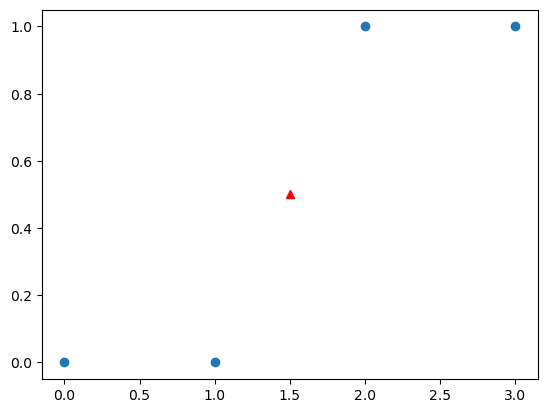

In [ ]:
plt.scatter([0,1,2,3],[0,0,1,1])
plt.plot([1.5],neigh.predict([[1.5]]), marker='^', c='r')
plt.show()

In [ ]:
# 예시였음-----------------------------------------------

In [ ]:
# 학습모델 인스턴스 생성
model=KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수

model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_ 
# feature 는 1개, 샘플은 44개, 거리재는 법:유클리디안, 끝에는 되고 나옴??

(1, 42, 'euclidean', {})

[4] 최적의 K 찾기

In [ ]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 <== 모델 성능 좌우 : 하이퍼 파라미터, hyper parameter
    model.n_neighbors=k

    # 성능 평가
    score= model.score(X_test_scaled, y_test)

    scores[k]=score


In [ ]:
list(scores.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

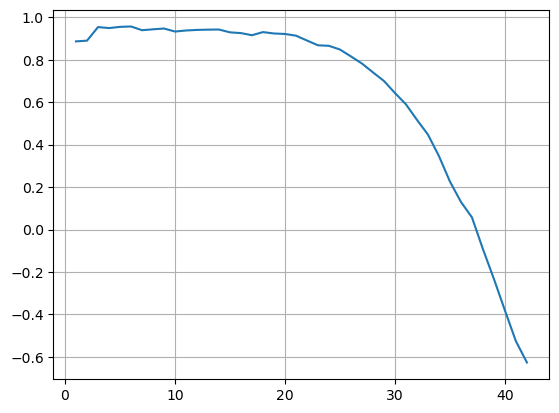

In [ ]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()


In [ ]:
#                                 x=(key, value) 튜플형태   
sorted(scores.items(), key=lambda x:x[1], reverse=True)

[(6, 0.9570871622531959),
 (5, 0.9552309001331776),
 (3, 0.9541620518366766),
 (4, 0.9496548517220494),
 (9, 0.947476550061703),
 (8, 0.9436687954896039),
 (14, 0.9426915672987161),
 (13, 0.9421807206510717),
 (12, 0.940880713501685),
 (7, 0.9395617911241136),
 (11, 0.9381859273401066),
 (10, 0.9332517838419572),
 (18, 0.930627278995754),
 (15, 0.9293832644637922),
 (16, 0.9258668450207346),
 (19, 0.9240712120435385),
 (20, 0.9217739283727472),
 (17, 0.91580948011262),
 (21, 0.9137627929038845),
 (22, 0.8908523519528293),
 (2, 0.8902744839236241),
 (1, 0.8867767106725298),
 (23, 0.8684185788306937),
 (24, 0.8659178875544221),
 (25, 0.848420453624164),
 (26, 0.8158469323717102),
 (27, 0.7823678782245695),
 (28, 0.7407942749200485),
 (29, 0.7002359585202819),
 (30, 0.6434659396852467),
 (31, 0.5901199938949999),
 (32, 0.5170889607934805),
 (33, 0.44756110947435535),
 (34, 0.3462697346451107),
 (35, 0.2260512137880153),
 (36, 0.13025791100536255),
 (37, 0.05745336451571459),
 (38, -0.0923

In [ ]:
# 최고 성능의 K 값
best_k=sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

6

따라서 최적의 k갯수는 6개

In [ ]:
# 모델에 적용 => n_neighbors 에 설정
model.n_neighbors=best_k

[5] 새로운 데이터의 무게 예측하기

In [ ]:
new_length=input("농어 길이 : ")
print(f'new_length : {new_length}')

new_length : 44


In [ ]:
# 2D로 만들어주기, 스케일링 적용해주기

In [ ]:
# 2D DataFrame
dataDF=pd.DataFrame([[new_length]], columns=['Length'])
dataDF

,Length
0,44


In [ ]:
# 피쳐 스케일링
data_scaled=mmScaler.transform(dataDF)
data_scaled #  스케일링하는 데 값이 0에서 1 사이

array([[1.]])

In [ ]:
# 예측
model.predict(data_scaled)

array([1008.33333333])

In [ ]:
distance, index= model.kneighbors(data_scaled)
print(distance, index, sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[31 27 30  3 15 12]]


In [ ]:
X_train.iloc[index.reshape(-1)]

,Length
31,44.0
27,43.5
30,43.0
3,43.0
15,42.0
12,40.0


In [ ]:
X_train_scaled[[31, 27, 30,  3, 15, 12]]

array([[1.        ],
       [0.98595506],
       [0.97191011],
       [0.97191011],
       [0.94382022],
       [0.88764045]])

In [ ]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

1008.3333333333334

In [ ]:
y_train[31]

1000.0

In [ ]:
X_train

#### KNN Regressor 문제점/단점

In [33]:
# 임의의 데이터
new_length=100000

# 2D DataFrame
dataDF=pd.DataFrame([[new_length]],columns=['Length'])

# 피쳐 스케일링
data_scaled=mmScaler.transform(dataDF)


In [34]:
# 예측
model.predict(data_scaled)

array([1008.33333333])

- 범위 안에서만 예측가능
- Min Max가 정해져 있음

=> 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우 정확한 예측 불가!!